In [1]:
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy as sp

In [2]:
train = pd.read_csv('train.csv/train.csv')
y = train.TARGET
del train['TARGET']
##Total no of columns=371
##Two columns Target and ID were removed
##Target assigned to y

In [3]:
test = pd.read_csv('test/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.6 MB


In [5]:
submit = pd.DataFrame()
submit['ID'] = test['ID']

In [7]:
del train['ID']
del test['ID']

In [8]:
from sklearn.ensemble import RandomForestClassifier as rfc

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [9]:
randomforest = rfc(n_estimators=1000)

In [10]:
randomforest.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
importance = randomforest.feature_importances_

In [64]:
#[print(x,i) for x,i in enumerate(randomforest.feature_importances_)]

In [110]:
randomforest.estimators_.count

<function list.count>

In [35]:
std  = np.std([tree.feature_importances_ for tree in randomforest.estimators_],axis=0)

In [14]:
indices = np.argsort(importance)[::-1]

In [93]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.170000
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278.030000
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.770000
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64007.970000
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016


In [92]:
print ("Feature ranking")

for f in range(train.shape[1]):
    print(f+1,indices[f],train.columns[f],importance[indices[f]])

Feature ranking
1 368 var3 0.378956735323
2 1 var15 0.172394302794
3 329 imp_ent_var16_ult1 0.0342595433138
4 331 imp_op_var39_comer_ult1 0.0277114833035
5 326 imp_op_var39_comer_ult3 0.0220913007705
6 330 imp_op_var40_comer_ult1 0.0166850720514
7 190 imp_op_var40_comer_ult3 0.0165740896854
8 324 imp_op_var40_efect_ult1 0.0153711782429
9 328 imp_op_var40_efect_ult3 0.014810801846
10 182 imp_op_var40_ult1 0.0141545377249
11 277 imp_op_var41_comer_ult1 0.0140671327858
12 323 imp_op_var41_comer_ult3 0.0135122771788
13 325 imp_op_var41_efect_ult1 0.0112449560381
14 164 imp_op_var41_efect_ult3 0.0100793681346
15 274 imp_op_var41_ult1 0.00994413843839
16 279 imp_op_var39_efect_ult1 0.00967331613057
17 275 imp_op_var39_efect_ult3 0.00946992682626
18 193 imp_op_var39_ult1 0.0078151875438
19 276 imp_sal_var16_ult1 0.00757539262277
20 138 ind_var1_0 0.00734047442697
21 289 ind_var1 0.00726734202027
22 278 ind_var2_0 0.00552177567288
23 14 ind_var2 0.00501996695972
24 88 ind_var5_0 0.004499934734

In [15]:
print ("Feature ranking")

for f in range(train.shape[1]):
    print(f+1,indices[f],train.columns[f],importance[indices[f]])

Feature ranking
1 0 ID 0.251919162502
2 369 var3 0.203542883223
3 2 var15 0.14962729024
4 332 imp_ent_var16_ult1 0.0248947545234
5 330 imp_op_var39_comer_ult1 0.0232092076698
6 327 imp_op_var39_comer_ult3 0.0184377290458
7 325 imp_op_var40_comer_ult1 0.0149304620054
8 329 imp_op_var40_comer_ult3 0.0146039605877
9 183 imp_op_var40_efect_ult1 0.014584965363
10 191 imp_op_var40_efect_ult3 0.0133341427828
11 324 imp_op_var40_ult1 0.012941064292
12 278 imp_op_var41_comer_ult1 0.0129038820986
13 331 imp_op_var41_comer_ult3 0.0120497216845
14 165 imp_op_var41_efect_ult1 0.0110677584016
15 326 imp_op_var41_efect_ult3 0.00938691379237
16 276 imp_op_var41_ult1 0.00907193879567
17 280 imp_op_var39_efect_ult1 0.00901773167979
18 275 imp_op_var39_efect_ult3 0.00879129081823
19 194 imp_op_var39_ult1 0.00693410266943
20 277 imp_sal_var16_ult1 0.00636864857599
21 290 ind_var1_0 0.00617995298242
22 281 ind_var1 0.00479572635033
23 279 ind_var2_0 0.00472410990181
24 15 ind_var2 0.0039396800862
25 18 ind

In [12]:
##features that I want
features = []

for i,x in enumerate(randomforest.feature_importances_):
    if x!=0:
        features.append(train.columns[i])

In [17]:
features.append('ID')

In [13]:
train = train[features]
test = test[features]

In [14]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Columns: 321 entries, var3 to var38
dtypes: float64(108), int64(213)
memory usage: 186.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 0 to 75817
Columns: 321 entries, var3 to var38
dtypes: float64(106), int64(215)
memory usage: 186.3 MB


In [111]:
plt.figure()

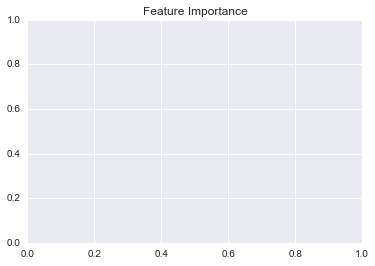

In [112]:
plt.title("Feature Importance")

<Container object of 369 artists>

C:\Users\shubham\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


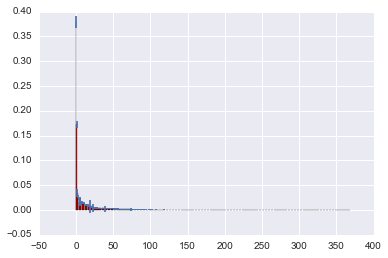

In [113]:
plt.bar(left=range(train.shape[1]),height=importance[indices],color='red',yerr = std[indices],align='center')

([<matplotlib.axis.XTick at 0x99de56eb8>,
 <a list of 369 Text xticklabel objects>)

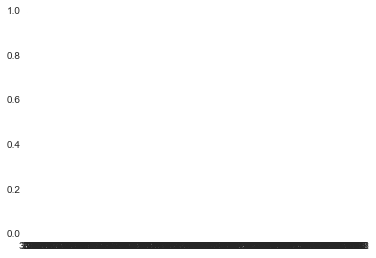

In [114]:
plt.xticks(range(train.shape[1]),indices)

(-1, 369)

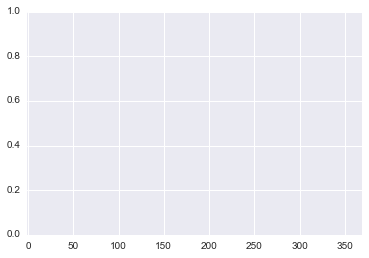

In [115]:
plt.xlim(-1,train.shape[1])

In [100]:
%matplotlib inline

In [116]:
plt.show()

In [118]:
plt.close()

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.cross_validation import cross_val_score

In [138]:
from sklearn.cross_validation import cross_val_score

In [ ]:
cross_val_score(randomforest,train,y,scoring='roc_auc',cv=10)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

In [159]:
submit = pd.DataFrame()

In [160]:
submit['ID'] = test['ID']

In [161]:
submit['TARGET'] = pd.DataFrame(randomforest.predict_proba(test)[:,1])

In [162]:
submit.to_csv('submission_2ndApril.csv',index=False)

## Reachead a score of about 0.68 on public leaderboard

## Now I am going to use more sophisticated classifier to see the change

In [163]:
from sklearn.ensemble import gradient_boosting

In [164]:
gradient_boosting = gradient_boosting.GradientBoostingClassifier()

In [165]:
cross_val_score(gradient_boosting,train,y,scoring='roc_auc',cv=10)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

array([ 0.48165887,  0.83505884,  0.8133071 ,  0.8313106 ,  0.83734946,
        0.83532725,  0.78064762,  0.85532861,  0.75666826,  0.77224444])

In [166]:
gradient_boosting.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [170]:
submit02 = pd.DataFrame()

In [171]:
submit02['ID'] = test['ID']

In [173]:
submit02['TARGET'] = pd.Series(gradient_boosting.predict_proba(test)[:,1])

In [175]:
submit02.to_csv('submission02April02.csv',index=False)

## This Gradient boosting gives me 0.83 roc_auc

## Now I am going to use some more boosting alogorithms

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
adaboost = AdaBoostClassifier()

In [178]:
np.mean(cross_val_score(adaboost,train,y,scoring='roc_auc',cv=10))

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:531: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return parameter in getargspec(estimator.fit)[0]
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead

0.82557284563240574

In [179]:
adaboost.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:531: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return parameter in getargspec(estimator.fit)[0]
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [180]:
submit03 = pd.DataFrame()

In [181]:
submit03['ID'] = test['ID']

In [182]:
submit03['TARGET'] = pd.Series(adaboost.predict_proba(test)[:,1])

In [183]:
submit03.to_csv('submission02April03.csv',index=False)

In [186]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

### Trying extra_tree_classifier

In [187]:
extree = sl.ensemble.ExtraTreesClassifier()

In [188]:
np.mean(cross_val_score(extree,train,y,scoring='roc_auc',cv=10))

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

0.67271460416779216

## Hyperparameter tuning of Gradient boosting

In [189]:
from sklearn.ensemble import gradient_boosting

In [200]:
gboosting = gradient_boosting.GradientBoostingClassifier(n_estimators=1500,learning_rate=0.01)

In [201]:
gboosting.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [203]:
submit05  = pd.DataFrame()

In [204]:
submit05['ID'] = test['ID']

In [205]:
submit05['TARGET'] = pd.Series(gboosting.predict_proba(test)[:,1])

In [206]:
submit05.to_csv('submission3rdApril02.csv',index=False)

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
randomforest = RandomForestClassifier(n_estimators=17)

In [209]:
randomforest.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [214]:
submit06 = pd.DataFrame()

In [215]:
submit06['ID'] = test['ID']

In [216]:
submit06['TARGET']=pd.Series(randomforest.predict_proba(test)[:,1])

In [217]:
submit06.to_csv('submission3rdApril03.csv',index=False)

### checking with rf = ntree1000

In [23]:
train.info()
y.count()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Columns: 321 entries, var3 to var38
dtypes: float64(108), int64(213)
memory usage: 186.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75818 entries, 0 to 75817
Columns: 321 entries, var3 to var38
dtypes: float64(106), int64(215)
memory usage: 186.3 MB


In [24]:
from sklearn.ensemble import gradient_boosting

In [26]:
gbm = gradient_boosting.GradientBoostingClassifier(n_estimators=1500)

In [27]:
gbm.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
submit['TARGET'] = gbm.predict_proba(test)[:,1]

In [37]:
submit.to_csv("submission10thApril01.csv",index=False)

##This score is 0.825620

### Now I am going to change second parameter of GBM 

In [38]:
from sklearn import grid_search

In [40]:
parameter = {'n_estimators':[1000,1500,2000,2500,3000]}

In [42]:
grid_fit = grid_search.GridSearchCV(gbm,parameter,scoring='roc_auc')

In [43]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1000, 1500, 2000, 2500, 3000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [47]:
grid_fit.best_params_

{'n_estimators': 1000}

In [48]:
parameter = {'min_samples_split':[2,4,6,8,10]}

In [49]:
grid_fit = grid_search.GridSearchCV(gbm,parameter,scoring='roc_auc')

In [50]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [51]:
grid_fit.best_params_

{'min_samples_split': 6}

In [52]:
from sklearn.ensemble import gradient_boosting

In [53]:
parameter = {'min_samples_leaf':[1,3,4,6,7,8,9]}

In [54]:
grid_fit = grid_search.GridSearchCV(gbm,parameter)

In [55]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 3, 4, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [56]:
grid_fit.best_params_

{'min_samples_leaf': 9}

In [59]:
parameter = {'subsample':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

In [60]:
grid_fit = grid_search.GridSearchCV(gbm,parameter)

In [61]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [64]:
grid_fit.best_params_

{'subsample': 1.0}

In [65]:
parameter = {'max_depth':[3,5,7,9,10]}

In [66]:
grid_fit = grid_search.GridSearchCV(gbm,parameter,scoring='roc_auc')

In [67]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 10]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None, scoring='roc_auc', verbose=0)

In [69]:
grid_fit.best_params_

{'max_depth': 3}

In [74]:
parameter = {'max_features':['sqrt','log2','auto']}

In [75]:
grid_fit = grid_search.GridSearchCV(gbm,parameter,scoring='roc_auc')

In [76]:
grid_fit.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [77]:
grid_fit.best_params_

{'max_features': 'log2'}

In [ ]:
##max_features': 'log2, max_depth': 3, subsample': 1.0, min_samples_leaf': 9, n_estimators': 1000

In [81]:
gbm_tuned = gradient_boosting.GradientBoostingClassifier(n_estimators=1000,max_features='log2',max_depth=3,subsample=1.0,min_samples_leaf=9)

In [82]:
gbm_tuned.fit(train,y)

C:\Users\shubham\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='log2', max_leaf_nodes=None,
              min_samples_leaf=9, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [84]:
submit = pd.DataFrame()

In [87]:
submit['ID'] = test_m['ID']

In [88]:
submit['TARGET'] = pd.Series(gbm_tuned.predict_proba(test)[:,1])

In [90]:
##submission scored =  0.830334
submit.to_csv('submission_after_gbm_tune.csv',index=False)

In [83]:
gbm_tuned.predict_proba(test)[:,1]

array([ 0.06325944,  0.07878789,  0.00365055, ...,  0.00254107,
        0.04649813,  0.00149645])